## Actividad Resposición IA


### Task 1.1. Leer el archivo CSV proporcionado (framingham.csv) y almacenarlo en un p.array para ser trabajado en el notebook.

Para iniciar con este proceso, primero se deben importar las librerías correspondientes.

In [270]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

Posteriormente, ya se pueden importar los datos y almacenarlos en una matriz de NumPy.

In [271]:
data = pd.read_csv('framingham.csv')
data_numpy = np.array(data)

print(data_numpy)

[[  1.  39.   4. ...  80.  77.   0.]
 [  0.  46.   2. ...  95.  76.   0.]
 [  1.  48.   1. ...  75.  70.   0.]
 ...
 [  0.  48.   2. ...  84.  86.   0.]
 [  0.  44.   1. ...  86.  nan   0.]
 [  0.  52.   2. ...  80. 107.   0.]]


### Task 1.2. Ajustar un modelo polinomial en base al juego de datos cargado de forma matricial que relaciona las variables independientes con la variables dependendiente de salida

Se verifica si hay datos nulos o faltantes en el conjunto de datos 

In [272]:
print(data.isnull().sum())

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


Se cambian los datos nulos por promedio en caso ser una variables numérica y moda en caso de ser categórica

<AxesSubplot: >

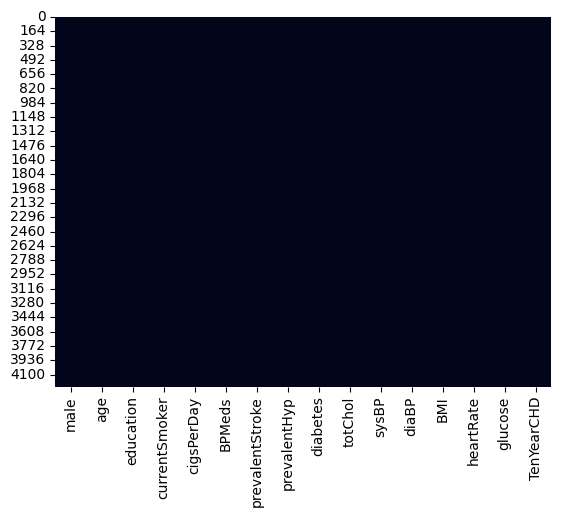

In [273]:
#Cambiar datos nulos por promedio en caso ser numerica y moda en caso de ser caregórica
if data.isnull().sum().any() > 0:
    for i in data.columns:
        if data[i].dtype == 'int64' or data[i].dtype == 'float64':
            data[i].fillna(data[i].mean(), inplace=True)
        else:
            data[i].fillna(data[i].mode()[0], inplace=True)

#Verificar si hay datos nulos
#Matriz de datos faltantes
sns.heatmap(data.isnull(), cbar=False)

Analizar la correlación de las variables con la variables dependiente

In [274]:
# Correlación entre las columnas y el status
data.corr()['TenYearCHD'].sort_values()

education         -0.053384
currentSmoker      0.019456
heartRate          0.022898
cigsPerDay         0.057775
prevalentStroke    0.061810
BMI                0.074680
totChol            0.081624
BPMeds             0.086774
male               0.088428
diabetes           0.097317
glucose            0.120406
diaBP              0.145299
prevalentHyp       0.177603
sysBP              0.216429
age                0.225256
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64

Seleccion de variables dependiendo de las correlación con la variables dependiente

In [275]:
# Eliminar las columnas con correlación menor a 0.40
variables = data.corr()['TenYearCHD'].sort_values().index
variables = variables[abs(data.corr()['TenYearCHD'].sort_values()) > 0.1]

# Eliminar las columnas que no se van a usar
data = data[variables]

print(variables)

Index(['glucose', 'diaBP', 'prevalentHyp', 'sysBP', 'age', 'TenYearCHD'], dtype='object')


Luego se verifica la distribucion de la variable objetivo

In [276]:
data['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

Se balancean los datos para obtner un mejor modelo

In [277]:

y = data['TenYearCHD']
x = data.drop(['TenYearCHD'], axis=1)

sm = SMOTE(random_state=1234)
x,y = sm.fit_resample(x, y)
y.value_counts()


0    3594
1    3594
Name: TenYearCHD, dtype: int64

Separar los datos en conjuntos de entenamiento y de prueba

In [278]:

# Dividir el dataset en conjunto de entrenamiento y conjunto de testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


### Task 1.3. Utilice la implementación vectorial del algoritmo de regresión lineal (descenso del gradiente visto en clase).

In [279]:
poly = PolynomialFeatures(degree=1)
X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

model = LogisticRegression(random_state=1234)
model.fit(X_train, y_train)

prediction = model.predict(X_test)

f1_score(prediction, y_test)

0.660524450744153

### Task 1.4 Usando cross-validation determine el grado del polinomio que mejor describe la nube de puntos (encuentre el mejor balance entre apego a los datos de entrenamiento y generalización para datos previamente no observados).

In [280]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('logistic', LogisticRegression(max_iter=500))
])


param_grid = {'poly__degree': [1, 2, 3, 4, 5]}
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(X_train, y_train)

print("Best polynomial degree:", grid_search.best_params_['poly__degree'])
print("Best mean cross-validated F1 score:", grid_search.best_score_)

Best polynomial degree: 1
Best mean cross-validated F1 score: 0.6607564028730587


### Task 1.5. Haga un análisis sobre sus hallazgos.
